<a href="https://colab.research.google.com/github/virtualfarhan/IIITH-PROJECTS/blob/main/AIML_Probabilistic_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1

1) Try padding in convolution on lotus.jpg and show results.

Padding in convolution refers to the process of adding extra pixels or values around the input data before applying the convolution operation. The primary purpose of padding is to preserve the spatial dimensions of the input volume, especially at the edges, and to ensure that the convolution operation does not result in a reduction of the output size.

There are two main types of padding: zero-padding and valid (no-padding).

1. **Zero-padding (Same Padding):** In zero-padding, extra rows and columns are added to the input data, and the values of these added pixels are set to zero. This ensures that the convolutional operation considers the pixels at the edges of the input data and helps to maintain the spatial dimensions of the input and output volumes.


2. **Valid Padding (No Padding):** In valid padding, no extra pixels are added to the input data. As a result, the convolution operation is only applied to positions where the filter and the input data completely overlap. This leads to a reduction in the spatial dimensions of the output compared to the input.

Choosing the appropriate padding strategy depends on the specific requirements of the neural network architecture and the task at hand. Zero-padding is often used when preserving spatial information is important, while valid padding may be chosen to reduce computational cost or when spatial information at the edges is less critical.


The code demonstrates the convolution operation of a 2D matrix (image) with various filters


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def apply_filter(img, filter):
    output = cv2.filter2D(img, -1, filter)
    return output

In [ ]:
def plot_images(images, titles, tick_params=True):
    n = len(images)
    fig = plt.figure(figsize=(10, 4))
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        if len(images[i].shape) == 2:
            ax.imshow(images[i], cmap='gray', extent=(0, images[i].shape[1], images[i].shape[0], 0))
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        if not tick_params:
            plt.tick_params(axis='both', labelbottom=False, bottom=False, labelleft=False, left=False)
    plt.show()

In [ ]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   2594      0  0:00:01  0:00:01 --:--:-- 2749k
Original image size:  (99, 100)


In [ ]:
# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

In [ ]:
# Vertical edge filter
filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

images.append(filter)
titles.append('Filter')

In [ ]:
# Apply this filter to image with padding
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output with Padding')


Output image size:  (99, 100)


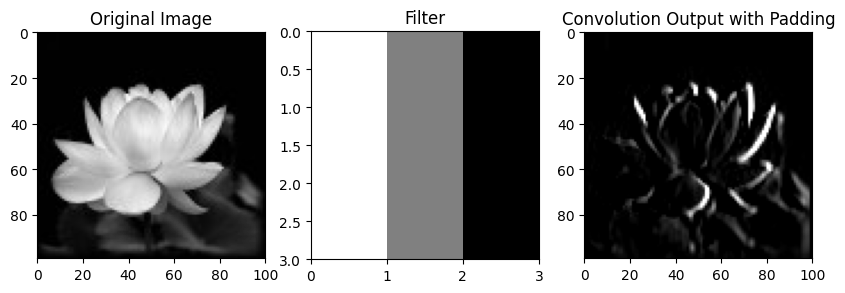

In [ ]:
# Let's plot the images
plot_images(images, titles)

2) Try stride in convolution on lotus.jpg and show results

In [ ]:
def apply_convolution_with_stride(img, filter, stride):
    # Use numpy's stride_tricks to achieve the effect of convolution with stride
    output = np.lib.stride_tricks.sliding_window_view(img, filter.shape)
    output = np.sum(output * filter, axis=(-1, -2))

    # Downsample the result to account for the stride
    output = output[::stride, ::stride]

    return output

In [ ]:
def plot_images(images, titles, tick_params=True):
    n = len(images)
    fig = plt.figure(figsize=(10, 4))
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        if len(images[i].shape) == 2:
            ax.imshow(images[i], cmap='gray', extent=(0, images[i].shape[1], images[i].shape[0], 0))
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        if not tick_params:
            plt.tick_params(axis='both', labelbottom=False, bottom=False, labelleft=False, left=False)
    plt.show()

In [ ]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   3113      0 --:--:-- --:--:-- --:--:--  5174


In [ ]:
# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

Original image size:  (99, 100)


In [ ]:
# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

In [ ]:
# Vertical edge filter
filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

images.append(filter)
titles.append('Filter')

In [ ]:
# Apply this filter to image with stride
stride = 2
output_stride = apply_convolution_with_stride(image, filter, stride)
images.append(output_stride)
titles.append('Convolution Output with Stride')

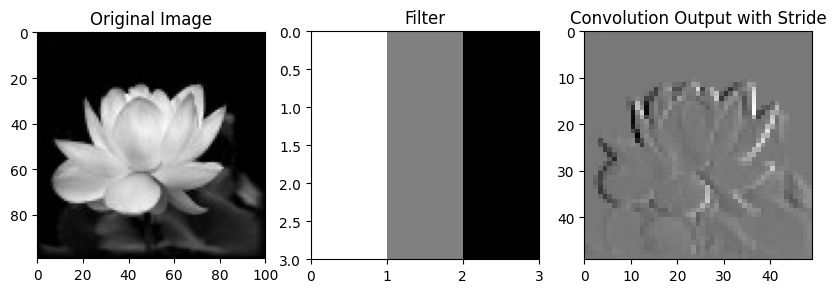

In [ ]:
# Let's plot the images
plot_images(images, titles)

In [ ]:
output_stride.shape

(49, 49)

CNN and Using Learnt Representations

Exercise 2

1) What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

In a convolutional neural network (CNN), the number of parameters in a convolutional layer is determined by the size of the kernel (filter), the number of input channels, and the number of output channels.

For a single 5x5 kernel, the number of parameters is given by:

Parameters = {input channels} {output channels} + 1) {kernel size}^2

Now, let's consider the equivalent stacked 3x3 kernels. In this case, we can stack two 3x3 kernels to get an effective 5x5 receptive field. The number of parameters for two 3x3 kernels is given by:

Parameters = 2 {input channels}{output channels} + 1){kernel size}^2

Now, let's find the ratio of parameters for a single 5x5 kernel to the equivalent stacked 3x3 kernels.

Ratio ={\text{Parameters for 5x5 kernel}}{\text{Parameters for stacked 3x3 kernels}}

{Ratio} = {(\text{input channels}{output channels} + 1)  5^2}{2 {input channels}{output channels} + 1)  3^2} \]

{Ratio} = {5^2}{2 \times 3^2}

{Ratio} = {25}{18}

Therefore, the ratio of parameters in a single 5x5 kernel to equivalent stacked 3x3 kernels is c{25}{18}

2) How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

The idea is to use a combination of 3x3 convolution layers with appropriate padding and strides to mimic the effect of a single 7x7 convolution layer.

Here's how you can modify your CNN class to replace the 7x7 convolution with 3x3 convolutions:

In [2]:
# Import packages
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set seeds for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

batch_size_train = 128
batch_size_test = 128

In [4]:
# Images in torchvision datasets are PIL Images in range [0,1] so we need
# 'ToTensor' transform to convert them into tensors
train_data = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=False)

print('Training data shape : ', train_data.data.shape, train_data.targets.shape)
print('Testing data shape : ', test_data.data.shape, test_data.targets.shape)


100%|██████████| 9912422/9912422 [00:00<00:00, 102414581.04it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70264323.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30903211.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2974785.88it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training data shape :  torch.Size([60000, 28, 28]) torch.Size([60000])
Testing data shape :  torch.Size([10000, 28, 28]) torch.Size([10000])


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_data.targets.numpy())
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


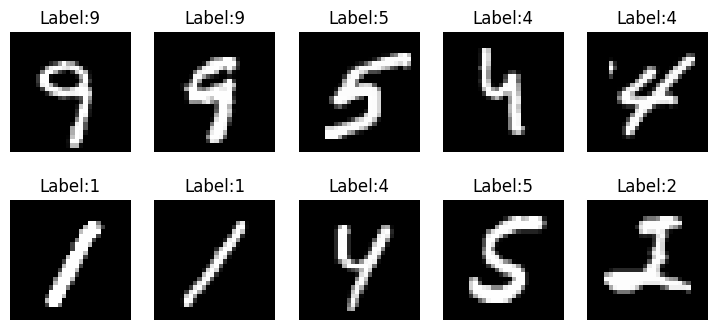

In [6]:
# Helper function to plot data
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(9, 4))
  cols, rows = 5, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

plot_data(train_data.data, train_data.targets.numpy())

In [7]:
class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Additional 3x3 convolution layers to replace the 7x7 convolution
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        # fully connected layer
        self.fc = nn.Linear(64 * 7 * 7, 128)
        # output layer 10 classes
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)

        # Additional 3x3 convolution layers
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)

        # flatten the output for FC layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        output = self.out(x)
        return output


In [8]:
def train(num_epochs, model, train_loader, loss_func, optimizer):
  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Put data on devices
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds == labels).sum().item()
      running_acc += correct

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc * 100))

  return train_losses, train_acc

In [9]:
def test(model, test_loader):
  # Eval mode
  model.eval()
  test_acc = 0
  correct = 0
  for i, (images, labels) in enumerate(test_loader):
    # Deactivate autograd engine (don't compute grads since we're not training)
    with torch.no_grad():
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      # Calculate number of correct predictions
      _, preds = torch.max(output, dim=1)
      correct += (preds == labels).sum().item()

  test_acc = correct / len(test_loader.dataset)
  print('Test Accuracy: {:.4f}'.format(test_acc * 100))
  # Plot the images with predicted labels for the last batch in the test set
  plot_data(images.data.cpu().numpy(), preds.data.cpu().numpy(), test_loader.dataset.classes)

In [10]:
# Build the model object and put on the device
model = ModifiedCNN().to(device)  # Make sure to use ModifiedCNN instead of CNN
print(model)

# Cross Entropy loss for multi-class classification
loss_func = nn.CrossEntropyLoss()

# Basic SGD optimizer with 0.01 learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
num_epochs = 10
train_losses, train_acc = train(num_epochs, model, train_loader, loss_func, optimizer)

ModifiedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=3136, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1/10, Loss: 0.0179, Accuracy: 14.0417
Epoch 2/10, Loss: 0.0144, Accuracy: 55.4583
Epoch 3/10, Loss: 0.0034, Accuracy: 86.9000
Epoch 4/10, Loss: 0.0023, Accuracy: 90.8067
Epoch 5/10, Loss: 0.0018, Accuracy: 93.0817
Epoch 6/10, Loss: 0.0014, Accuracy: 94.5983
Epoch 7/10, Loss: 0.0011, Accuracy: 95.5667
Epoch 8/10, Loss: 0.0009, Accuracy: 96.3200
Epoch 9/10, Loss: 0.000

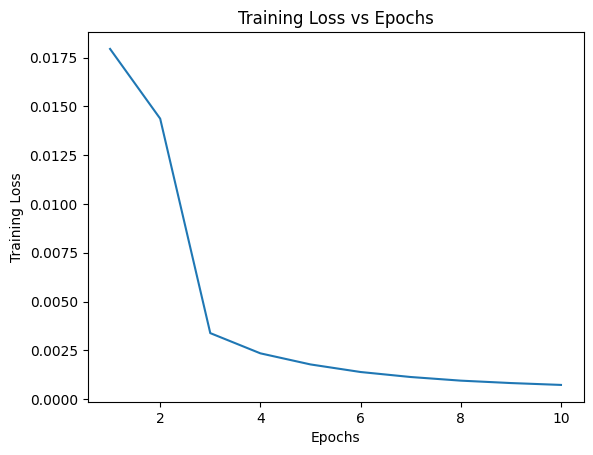

Test Accuracy: 97.5500


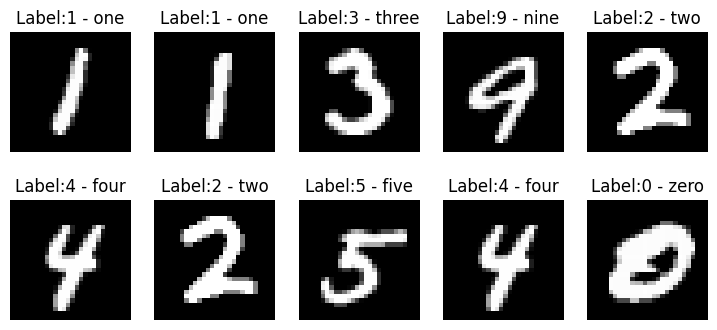

In [11]:
# Plot training loss
plt.plot(np.arange(1, num_epochs + 1), train_losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs')
plt.show()

# Testing
test(model, test_loader)

CNN Visualization

1) List a few practical applications of convolutional autoencoders.

---
Convolutional autoencoders have found applications in various domains due to their ability to learn hierarchical representations of data. Here are a few practical applications:

1. **Image Denoising:**
   - Convolutional autoencoders can be used to remove noise from images by training the model on noisy images and their clean counterparts. The model learns to encode the noise and generate denoised images.

2. **Image Compression:**
   - Autoencoders, including convolutional autoencoders, can be employed for image compression. By training the model to reconstruct images from compressed representations, it learns efficient representations that capture essential features.

3. **Anomaly Detection:**
   - Convolutional autoencoders can be trained on normal data to learn a representation of the typical patterns. Anomalies or outliers can be detected when the model fails to reconstruct them accurately.

4. **Feature Extraction for Transfer Learning:**
   - Convolutional autoencoders are often used as feature extractors in transfer learning. By training the autoencoder on a large dataset, the encoder part can be used to extract features for a different but related task.

5. **Medical Image Analysis:**
   - Convolutional autoencoders find applications in medical image analysis, such as denoising medical images, reconstructing 3D structures, and detecting anomalies in medical scans.

6. **Super-Resolution:**
   - Autoencoders, including convolutional variants, can be used for image super-resolution. By training on low-resolution and high-resolution image pairs, the model learns to generate high-resolution images from low-resolution inputs.

7. **Semantic Segmentation:**
   - Convolutional autoencoders can be extended for semantic segmentation tasks. By training the model on images with pixel-wise labels, it can learn to segment and classify different objects or regions within an image.

8. **Video Analysis:**
   - Convolutional autoencoders can be applied to video data for tasks like video denoising, summarization, or anomaly detection in sequences of frames.

9. **Generative Modeling:**
   - Convolutional autoencoders can serve as the basis for generative models, such as generating new images from the learned latent space. Variations like Variational Autoencoders (VAEs) extend this capability.

10. **Style Transfer:**
    - By training convolutional autoencoders on pairs of images with different styles, the model can be used for artistic style transfer, where the content of one image is transferred to the style of another.

These applications highlight the versatility of convolutional autoencoders in various domains, leveraging their ability to capture hierarchical and spatial features in data.


2) What change do we need to make for the autoencoder to reduce into PCA?

To make an autoencoder function similarly to Principal Component Analysis (PCA), you need to make a few adjustments to the architecture and training process. Here are the key changes:

Linear Activation in the Output Layer:

1) In a standard autoencoder, the output layer often uses a non-linear activation function (such as sigmoid or hyperbolic tangent). To make it behave more like PCA, use a linear activation function in the output layer.
Mean Squared Error Loss:

2) PCA minimizes the mean squared reconstruction error, so use Mean Squared Error (MSE) loss in the training process. This loss encourages the autoencoder to reconstruct input data with minimal distortion.
Encoder and Decoder Symmetry:

Make the encoder and decoder symmetric, meaning the encoder and decoder architectures should mirror each other. This symmetry is characteristic of PCA.